Thuật toán hoạt động trong 3 bước đơn giản:

1 / Bước đầu tiên lấy 3 điểm ngẫu nhiên từ các điểm đã đặt và nối chúng lại như lộ trình ban đầu.

2 / Sau đó, mỗi bước tiếp theo, mình lấy ngẫu nhiên một điểm từ tập hợp các điểm còn lại. Và cố gắng tìm đoạn gần nhất của tuyến đường mà mình có và kết nối nó với nó.

3 / mình tiếp tục lặp lại bước 2 / cho đến khi tập hợp các điểm còn lại là trống.

In [33]:
# trước khi chạy chương trình cần cài đặt các thư viện sau 
# pip install utm
# pip install geopy
# pip install folium
# pip install numpy
# pip install pandas
# pip install matplotlib

In [1]:
import math
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import utm 
from geopy.distance import geodesic
from geopy.geocoders import Nominatim
from time import * 
import folium

In [5]:
from geopy import Nominatim
# from geopy import geodesic

In [35]:
# Khoảng cách giữa hai điểm
# x y
# def distance(point1, point2):
#     return math.sqrt((point2[0]-point1[0])**2 + (point2[1]-point1[1])**2)

In [36]:
# print(distance((10.7873363,106.7581543),(10.85121,106.8001109)))

In [2]:
# tính khoảng cách thực tế trên bản đồ từ 2 biến lat long
def distance(point1, point2):
    return geodesic(point1,point2).km

In [38]:
print(distance((10.7873363,106.7581543),(10.85121,106.8001109)))

8.424309844986634


In [3]:
# Giao điểm giữa hai đoạn
def intersects(p1, q1, p2, q2):
    def on_segment(p, q, r):
        if r[0] <= max(p[0], q[0]) and r[0] >= min(p[0], q[0]) and r[1] <= max(p[1], q[1]) and r[1] >= min(p[1], q[1]):
            return True
        return False

    def orientation(p, q, r):
        val = ((q[1] - p[1]) * (r[0] - q[0])) - ((q[0] - p[0]) * (r[1] - q[1]))
        if val == 0 : return 0
        return 1 if val > 0 else -1

    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, q1, p2) : return True
    if o2 == 0 and on_segment(p1, q1, q2) : return True
    if o3 == 0 and on_segment(p2, q2, p1) : return True
    if o4 == 0 and on_segment(p2, q2, q1) : return True

    return False

#Khoảng cách sử dụng Double Linked Node
class Node:
    def __init__(self, dataval=None):
        self.dataval = dataval
        self.prevval = None
        self.nextval = None

class TSP_TimeTraveler():
    def __init__(self):
        self.count = 0
        self.position = None
        self.length = 0
        self.traveler = None
        self.travelert_past = None
        self.is_2opt = True

    def get_position(self):
        return self.position

    def traveler_init(self):
        self.traveler = self.position
        self.travelert_past = self.position.prevval
        return self.traveler


    def traveler_next(self):
        if self.traveler.nextval != self.travelert_past:
            self.travelert_past = self.traveler
            self.traveler = self.traveler.nextval
            return self.traveler, False
        else :
            self.travelert_past = self.traveler
            self.traveler = self.traveler.prevval
            return self.traveler, True 

    # thêm một điểm vào tuyến đường hiện tại:
    def add_city(self, point):
        node = Node(point)
        if self.count <=0 :
            self.position = node
        elif self.count == 1 :
            node.nextval = self.position
            node.prevval = node
            self.position.nextval = node
            self.position.prevval = self.position
            self.length = distance(self.position.dataval,node.dataval)
        elif self.count == 2 :
            node.nextval = self.position.nextval
            node.prevval = self.position
            self.position.nextval.prevval = node
            self.position.nextval = node
            self.length = distance(self.position.dataval,node.dataval)
        else : 
            # Tạo chuyến du lịch
            traveler = self.traveler_init()

            c = traveler #vị trí hiện tại
            prev = False # liên kết ngược

            n, prev = self.traveler_next()

            # Tính toán độ dài của việc thêm điểm vào con đường
            Min_prev = prev
            Min_L = self.length-distance(c.dataval,n.dataval)+distance(c.dataval,node.dataval)+distance(node.dataval,n.dataval)
            Min_Node = c

            traveler = n

            while traveler != self.position :
                c = n #vị trí hiện tại

                n, prev = self.traveler_next()

                # Tính toán độ dài của việc thêm điểm vào con đường
                L = self.length-distance(c.dataval,n.dataval)+distance(c.dataval,node.dataval)+distance(node.dataval,n.dataval)

                # Tìm kiếm đường dẫn đến điểm với độ dài tối thiểu
                if L < Min_L :
                    Min_prev = prev 
                    Min_L = L
                    Min_Node = c
                traveler = n    

            if Min_prev : 
                Min_Next_Node = Min_Node.prevval
            else :
                Min_Next_Node = Min_Node.nextval

            node.nextval = Min_Next_Node
            node.prevval = Min_Node

            if Min_prev :
                Min_Node.prevval = node
            else :
                Min_Node.nextval = node

            if Min_Next_Node.nextval == Min_Node:
                Min_Next_Node.nextval = node
            else :
                Min_Next_Node.prevval = node
            
            self.length = Min_L
            
            #2-OP
            if self.is_2opt == True :
                self._2opt(Min_Node, node, Min_Next_Node)

        # Tăng số lượng điểm trong tuyến đường
        self.count = self.count + 1

    #áp dụng 2opt cho a-b-c
    def _2opt(self, a, b, c):
        traveler = self.traveler_init()

        c1 = a
        c2 = b

        n1 = b
        n2 = c

        c = traveler #vị trí hiện tại
        t_prev = False
        n, t_prev = self.traveler_next()

        traveler = n

        while traveler != self.position :

            cross = False

            if (c.dataval != c1.dataval and c.dataval != c2.dataval and n.dataval != c1.dataval and n.dataval != c2.dataval) and intersects(c.dataval, n.dataval, c1.dataval, c2.dataval):
                
                self._2optswap(c,n,c1,c2)
                cross = True
                a = n
                n = c1
                c2 = a
                    
            if (c.dataval != n1.dataval and c.dataval != n2.dataval and n.dataval != n1.dataval and n.dataval != n2.dataval) and intersects(c.dataval, n.dataval, n1.dataval, n2.dataval):
                
                self._2optswap(c,n,n1,n2)
                cross = True
                a = n
                n = n1
                n2 = a

            if cross:
                return

            c = n #vị trí hiện tại
            n, t_prev = self.traveler_next()
            traveler = n            


    # Hoán đổi giữa 2 đoạn chéo a-b và c-d
    def _2optswap(self, a, b, c, d):

        if a.nextval == b :
            a.nextval = c
        else :
            a.prevval = c

        if b.prevval == a :
            b.prevval = d
        else :
            b.nextval = d

        if c.nextval == d :
            c.nextval = a
        else :
            c.prevval = a

        if d.prevval == c :
            d.prevval = b
        else :
            d.nextval = b

        self.length = self.length - distance(a.dataval,b.dataval) - distance(c.dataval,d.dataval) + distance(a.dataval,c.dataval) + distance(b.dataval,d.dataval)


    # Lấy danh sách các tuyến đường
    def getRoute(self):
        result = []

        traveler  = self.traveler_init()
        result.append(traveler.dataval)

        traveler, prev  = self.traveler_next()

        while traveler != self.position :
            result.append(traveler.dataval)
            traveler, prev = self.traveler_next()

        result.append(traveler.dataval)

        return result

    def Solve(self, Set_points, with_2opt = True):
        print("Solving TSP")

        # Để tính toán thời gian thực hiện
        time_start = datetime.datetime.now()

        # Sao chép danh sách điểm đã đặt
        points = Set_points.copy()

        # Chuyển danh sách thành tập hợp
        points = set(tuple(i) for i in points)

        # Thêm
        while len(points)>0 :
            # sleep(2)
            # print(points)
            print("Points left : ", len(points),'              ', end="\r")
            point = points.pop()
            self.add_city(point)

        result = self.getRoute()

        time_end = datetime.datetime.now()
        delta = (time_end-time_start).total_seconds()

        L=0
        for i in range(len(result)-1):
            # L = L + math.sqrt((result[i-1][0]-result[i][0])**2 + (result[i-1][1]-result[i][1])**2)
            L=L+geodesic(result[i-1],result[i]).km

        print("Points left : ", len(points),' Done              ',)
        print("Execution time : ", delta, "secs")
        print("Average time per point : ", 1000*delta/len(Set_points), "msecs")
        print("Length : ", L)

        return result,L,delta


In [6]:
# points
points=[]
filename="E:\Khoa học trẻ\TKinter\TkinterMapView-main\TkinterMapView-main\examples\hcm.txt"
data=np.loadtxt(filename,delimiter=',')
for i in range (data.shape[0]):
    points.append( tuple(data[i]))

convert_latlng_xy_point=[]
for i in points:
    u = utm.from_latlon(i[0],i[1])
    convert_latlng_xy_point.append(u[:2])

#Solve TSP
TSP = TSP_TimeTraveler()
route,khoancach,giaythuchien = TSP.Solve(points,with_2opt = True)

# chuyển các lat,lng thành tọa độ trục oxy
convert_latlng_xy=[]
zone=[]
for i in route:
    u = utm.from_latlon(i[0],i[1])
    convert_latlng_xy.append(u[:2])
    zone.append(u)
    
zone_route=convert_latlng_xy.copy()
# thêm vùng zone 
for i in range(len(zone_route)):
    for j in range(len(zone)):
        if (zone_route[i]==zone[j][:2]):
            zone_route[i]+=zone[j][2:]

# chuyển tọa độ x,y sang lat,lng
covert_xy_latlng=[]
for i in zone_route:
    x=utm.to_latlon(*i)
    covert_xy_latlng.append(x)

covert_xy_latlng=pd.DataFrame(covert_xy_latlng)
covert_xy_latlng.to_csv("../Data/covert_xy_latlng.txt",index=False,header=False)



Solving TSP
Points left :  0  Done              
Execution time :  0.132521 secs
Average time per point :  12.047363636363634 msecs
Length :  16.972830834442853


In [7]:
route

[(10.79297297598525, 106.64739782156813),
 (10.837266408939287, 106.65900524552158),
 (10.840385489383497, 106.66501339361845),
 (10.838320155958206, 106.67130049149802),
 (10.829742547263795, 106.67252357884534),
 (10.83155760240619, 106.67793275048126),
 (10.833601907256599, 106.6819453351548),
 (10.84767574586504, 106.67921352478844),
 (10.823587219715717, 106.69335506863271),
 (10.822006520023992, 106.6788067671696),
 (10.8082971, 106.6654911),
 (10.79297297598525, 106.64739782156813)]

In [62]:
# duongditxt=pd.DataFrame(route)
# duongditxt.to_csv("../Website/duongdi.txt",index=False,header=False)

[(10.79297297598525, 106.64739782156813),
 (10.79895909417991, 106.64705449886665),
 (10.806631268383818, 106.65859872628755),
 (10.801699178920147, 106.66361982150555),
 (10.786860267647382, 106.6529768162295),
 (10.779523416460863, 106.64891466007379),
 (10.768205355779703, 106.6556010702797),
 (10.760490040948316, 106.66306834005724),
 (10.753828572040241, 106.66126589562816),
 (10.769343664262001, 106.68594221833642),
 (10.763525598154438, 106.69340948819595),
 (10.76828967500353, 106.69675688499278),
 (10.777672883648796, 106.6954383374234),
 (10.780440690529806, 106.69927375325976),
 (10.777055763145407, 106.70311826982764),
 (10.794368931261612, 106.71998196652896),
 (10.793889223863442, 106.72445420621527),
 (10.786396689935987, 106.72938778126188),
 (10.781843688380885, 106.73462345317488),
 (10.785258446008095, 106.74573852715406),
 (10.794538073798735, 106.74674698701695),
 (10.802842683351964, 106.75451466419932),
 (10.80461317954974, 106.75713250015582),
 (10.8334074970149

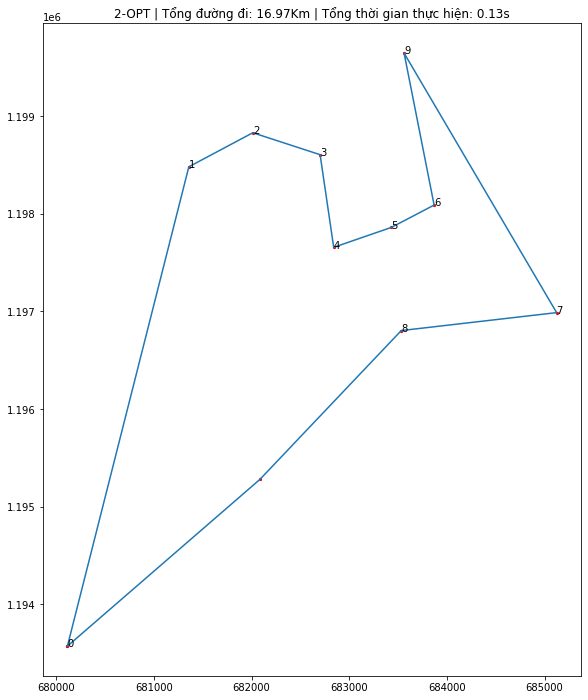

In [8]:
plt.figure(figsize=(12,12))
plt.scatter(*zip(*convert_latlng_xy), s=5, color="red")
for i in range(len(convert_latlng_xy_point)-1):
    j=0
    plt.annotate(str(i), xy=(convert_latlng_xy_point[i][j], convert_latlng_xy_point[i][j+1]), xytext=(
        convert_latlng_xy_point[i][j]-0.5, convert_latlng_xy_point[i][j+1]-5), color="black")
plt.plot(*zip(*convert_latlng_xy))
plt.axis('scaled')
plt.title("2-OPT | Tổng đường đi: "+ str(round(khoancach,2))+"Km | Tổng thời gian thực hiện: "+str(round(giaythuchien,2))+"s")
plt.show()

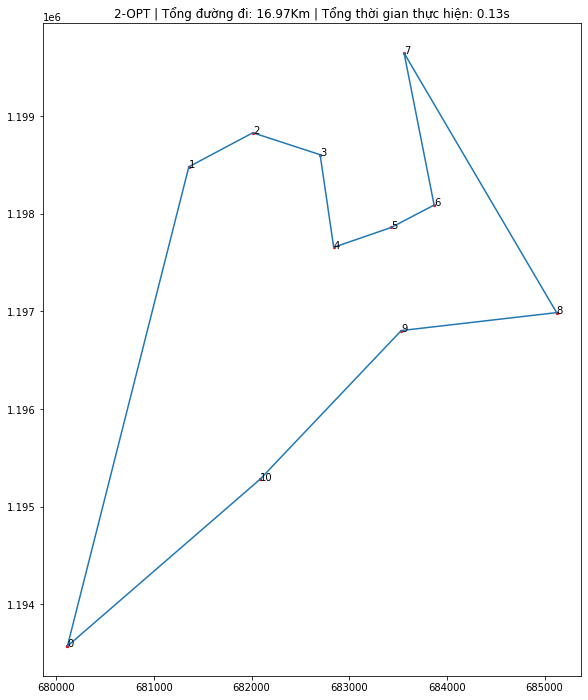

In [9]:
#Đoạn đường di chuyển
plt.figure(figsize=(12,12))
plt.scatter(*zip(*convert_latlng_xy), s=5, color="red")
for i in range(len(convert_latlng_xy)-1):
    j=0
    plt.annotate(str(i), xy=(convert_latlng_xy[i][j], convert_latlng_xy[i][j+1]), xytext=(
        convert_latlng_xy[i][j]-0.5, convert_latlng_xy[i][j+1]-5), color="black")
plt.plot(*zip(*convert_latlng_xy))
plt.axis('scaled')
plt.title("2-OPT | Tổng đường đi: "+ str(round(khoancach,2))+"Km | Tổng thời gian thực hiện: "+str(round(giaythuchien,2))+"s")
plt.show()

In [10]:
# l=[(10.85121,106.8001109),(10.7873363,106.7581543)]
# https://github.com/python-visualization/folium/issues/1106
m=folium.Map(location=route[0],zoom_start=15)
savediachi=[]
geolocator = Nominatim(user_agent="user_agent")
for i in range(len(route)):
    truydiachi = geolocator.reverse(f"{route[i][0]},{route[i][1]}")
    diachi=truydiachi.address
    savediachi.append(diachi)
    fixdiachia="<div style='width: 100%'><strong>"+str(i)+". "+diachi+"</strong></div>"
    test = folium.Html(fixdiachia, script=True)
    popup = folium.Popup(test, max_width=300,min_width=300)
    if i==0 or i==100:
        folium.Marker(route[i],popup=popup,tooltip=savediachi[i],icon=folium.Icon(color="red",icon="cloud")).add_to(m)
    else:
        folium.Marker(route[i],popup=popup,tooltip=savediachi[i] ,icon=folium.Icon(icon="home")).add_to(m)
    folium.PolyLine((route[i-1],route[i]),color="red").add_to(m)
m

In [18]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="my_user_agent")
loc = geolocator.geocode("Thành phố Hồ Chí Minh")
print("latitude is :-" ,loc.latitude,"\nlongtitude is:-" ,loc.longitude)

latitude is :- 10.6497425 
longtitude is:- 106.76198196200991


In [19]:
geolocator = Nominatim(user_agent="user_agent")
# 10.808782924189467, 106.66574352544048
# 10.809669529383878, 106.71276729224132
truydiachi = geolocator.reverse(f"{10.8088849 },{106.665545}")
diachi=truydiachi.address
diachi

'Sông Thao, Phường 2, Quận Tân Bình, Thành phố Hồ Chí Minh, 70000, Việt Nam'

In [7]:
import pandas as pd 
abc= pd.read_json("E:\Khoa học trẻ\Website\speechbase.json")
abc

,Kinh,Vi,DiaChi
0,10.792973,106.647398,"Hẻm 82 Trần Mai Ninh, Phường 12, Quận Tân Bình..."
1,10.798959,106.647054,"19c, Hoàng Hoa Thám, Phường 12, Quận Tân Bình,..."
2,10.806631,106.658599,"Sân Bóng Đá Chảo Lửa, Hẻm 6 Đồ Sơn, Phường 4, ..."
3,10.801699,106.663620,"Trần Quốc Hoàn, Phường 4, Quận Tân Bình, Thành..."
4,10.786860,106.652977,"Nhà Thờ Tân Trang, Tân Xuân, Phường 8, Quận Tâ..."
...,...,...,...
96,10.767151,106.641911,"Hẻm 22 Hòa Bình, Phường 5, Quận 11, Thành phố ..."
97,10.770501,106.642306,"Phường 5, Quận 11, Thành phố Hồ Chí Minh, 7000..."
98,10.774529,106.643756,"Giáo xứ Phú Bình, Hẻm 49 Trịnh Đình Trọng, Phư..."
99,10.796219,106.636926,"Phường Tân Sơn Nhì, Quận Tân Phú, Thành phố Hồ..."


In [44]:
# with open("diachi.txt","w", encoding="utf-8") as file:
#     for i in range(len(savediachi)):
#         file.write('"'+savediachi[i]+'",'+"\n")

In [109]:
mydict={"Kinh":[],"Vi":[],"DiaChi":[]}

In [110]:
kinh=[i[0] for i in route]
vi=[i[1] for i in route]
for i in range(len(kinh)):
    mydict["Kinh"].append(kinh[i])
    mydict["Vi"].append(vi[i])
    mydict["DiaChi"].append(savediachi[i])

['123', '456']

In [111]:
import json
with open('E:\Khoa học trẻ\Website\speechbase.json', 'w') as jsonfile:
	json.dump(mydict, jsonfile, indent = 4)

# Thuật toán tham lam 

In [11]:
n=len(convert_latlng_xy_point)
sodiem=[i for i in range(n)]
cung = [(i, j) for i in range(n) for j in range(n) if i != j]
x=[i[0] for i in points]
y=[i[1] for i in points]
khoancach = {(i, j): np.hypot(x[i]-x[j], y[i]-y[j])
            for i, j in cung}
khoancach1 = {(i, j): distance(points[i],points[j])
            for i, j in cung}

In [47]:
# plt.figure(figsize=(12,12))
# plt.scatter(x, y, color='red',s=3)

# for i in range(len(x)-1):
#     plt.annotate(str(i), xy=(x[i], y[i]), xytext=(
#         x[i], y[i]), color="black")

# plt.xlabel("Coord X")
# plt.ylabel("Coord Y")
# plt.title("Greedy Algorithm")
# plt.show()

In [12]:
def total_distancia(lista, distancia):
    dist = 0
    for i in range(len(lista)-1):
        n = lista[i]
        m = lista[i+1]
        dist += distancia[(m,n)]
    return dist


In [13]:
# timkiem điểm gần nhất
def Nearest_Neighbor(starting_node, ciudades, khoancach):
    
    time_start = datetime.datetime.now()

    NN = [starting_node]
    n = len(ciudades)  # số lượng điểm đi qua

    while len(NN) < n:
        k = NN[-1]
        nn = {(k, j): khoancach[(k,j)] for j in ciudades if ((j != k) and (j not in NN))}
        nn.items()
        # print(nn)
        new = min(nn.items(), key=lambda x: x[1])
        # print(new)
        NN.append(new[0][1])

    NN.append(starting_node)
    
    time_end = datetime.datetime.now()
    
    delta = (time_end-time_start).total_seconds()
    
    SumKC=total_distancia(NN, khoancach1)
    
    return NN,SumKC,delta

In [14]:
starting_node = 0
NN,SumKC,giay = Nearest_Neighbor(starting_node, sodiem, khoancach)

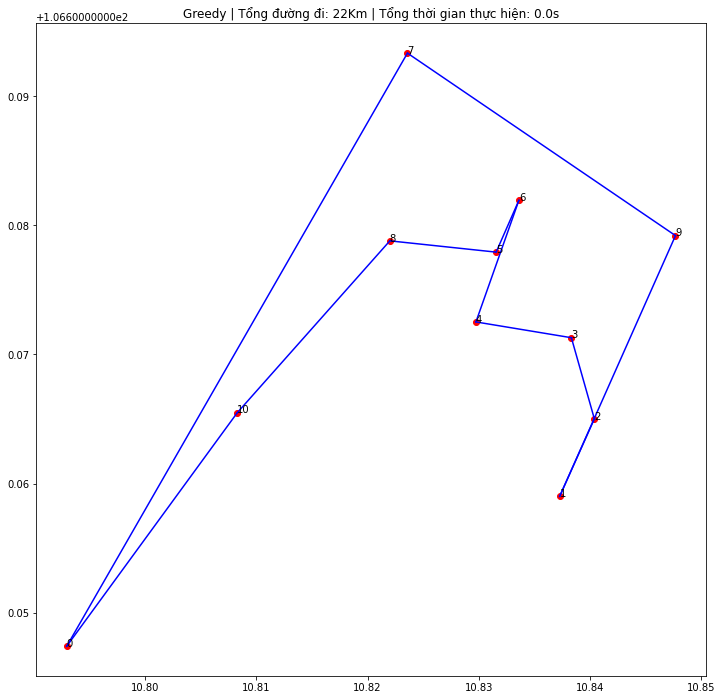

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(x, y, color='red')

for i in range(len(NN)-1):
    # plt.annotate(str(i), xy=(x[NN[i]], y[NN[i]]), xytext=(x[NN[i]], y[NN[i]]), color="black")
    plt.annotate(str(i), xy=(x[i], y[i]), xytext=(x[i], y[i]), color="black")
    plt.plot([x[NN[i]], x[NN[i+1]]], [y[NN[i]], y[NN[i+1]]], color="blue")

plt.title("Greedy | Tổng đường đi: "+ str(math.ceil(SumKC))+"Km | Tổng thời gian thực hiện: "+str(round(giay,2))+"s")
plt.show()

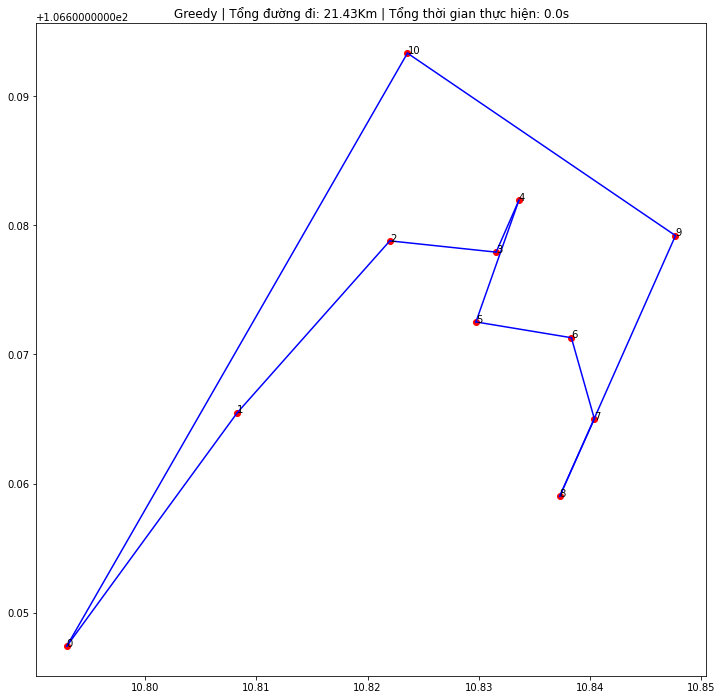

In [16]:
# đoạn đường di chuyển
plt.figure(figsize=(12,12))
plt.scatter(x, y, color='red')

for i in range(len(NN)-1):
    plt.annotate(str(i), xy=(x[NN[i]], y[NN[i]]), xytext=(x[NN[i]], y[NN[i]]), color="black")
    # plt.annotate(str(i), xy=(x[i], y[i]), xytext=(x[i], y[i]), color="black")
    plt.plot([x[NN[i]], x[NN[i+1]]], [y[NN[i]], y[NN[i+1]]], color="blue")

plt.title("Greedy | Tổng đường đi: "+ str(round(SumKC,2))+"Km | Tổng thời gian thực hiện: "+str(round(giay,2))+"s")
plt.show()

In [17]:
# l=[(10.85121,106.8001109),(10.7873363,106.7581543)]
# https://github.com/python-visualization/folium/issues/1106
m=folium.Map(location=(x[NN[0]],y[NN[0]]),zoom_start=15)
geolocator = Nominatim(user_agent="user_agent")
for i in range(len(x)+1):
    truydiachi = geolocator.reverse(f"{x[NN[i]]},{y[NN[i]]}")
    diachi=truydiachi.address
    fixdiachia="<div style='width: 100%'><strong>"+str(i)+". "+diachi+"</strong></div>"
    test = folium.Html(fixdiachia, script=True)
    popup = folium.Popup(test, max_width=300,min_width=300)
    if i==0 or i==100:
        folium.Marker((x[NN[i]],y[NN[i]]),popup=popup,tooltip="Click for more information",icon=folium.Icon(color="red",icon="cloud")).add_to(m)
    else:
        folium.Marker((x[NN[i]],y[NN[i]]),popup=popup,tooltip="Click for more information" ,icon=folium.Icon(icon="home")).add_to(m)
    folium.PolyLine(((x[NN[i-1]],y[NN[i-1]]),(x[NN[i]],y[NN[i]])),color="red").add_to(m)
m